## 1. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['target_names'])

['malignant' 'benign']


In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer['data'].shape


(569, 30)

In [8]:
df_cancer = pd.DataFrame(
    np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target'])
)

In [9]:
df_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [10]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [11]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 2. Visualizing and Understanding the Data

In [12]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [13]:
df_cancer['target'].value_counts(normalize=True) #NORMALIZE TO PERCENTAGE

1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

63% data is positive for cancer and 37% is negative for cancer. This shows signs of imbalanced data and is good to take note of when training a model.

<Axes: xlabel='target', ylabel='count'>

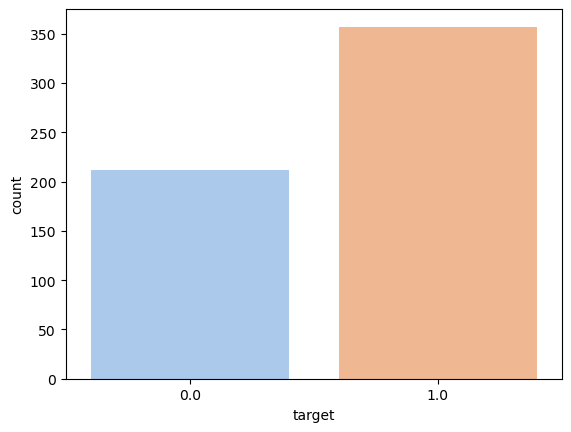

In [14]:
sns.countplot(x="target", data=df_cancer, palette="pastel")

<Axes: >

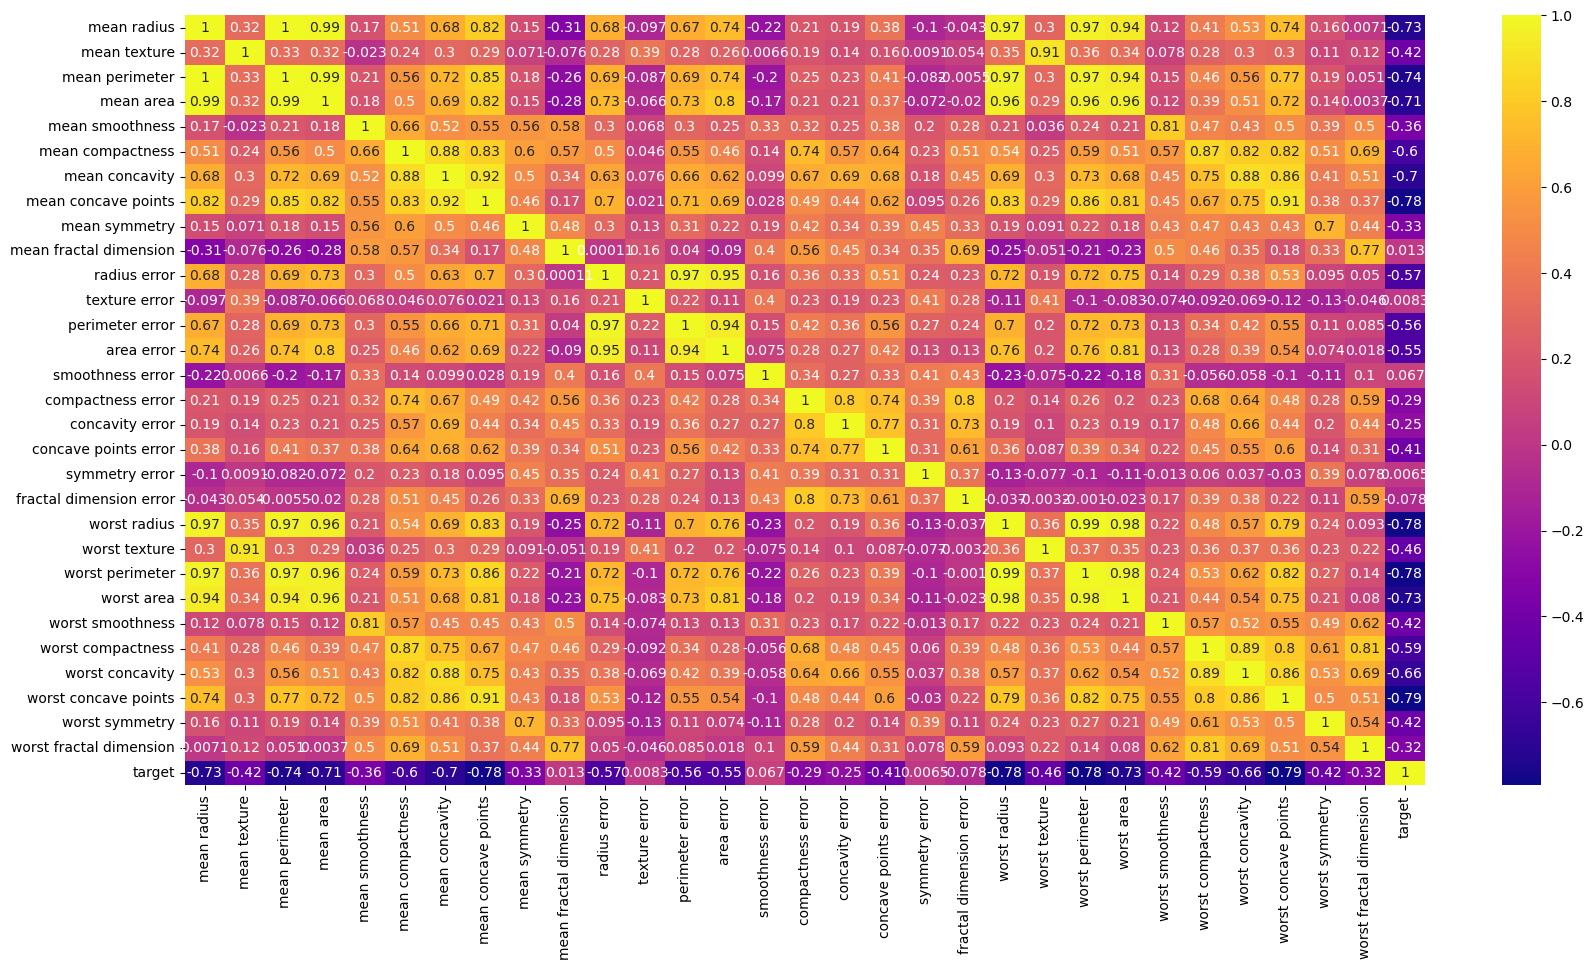

In [15]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_cancer.corr(), annot=True, cmap="plasma")

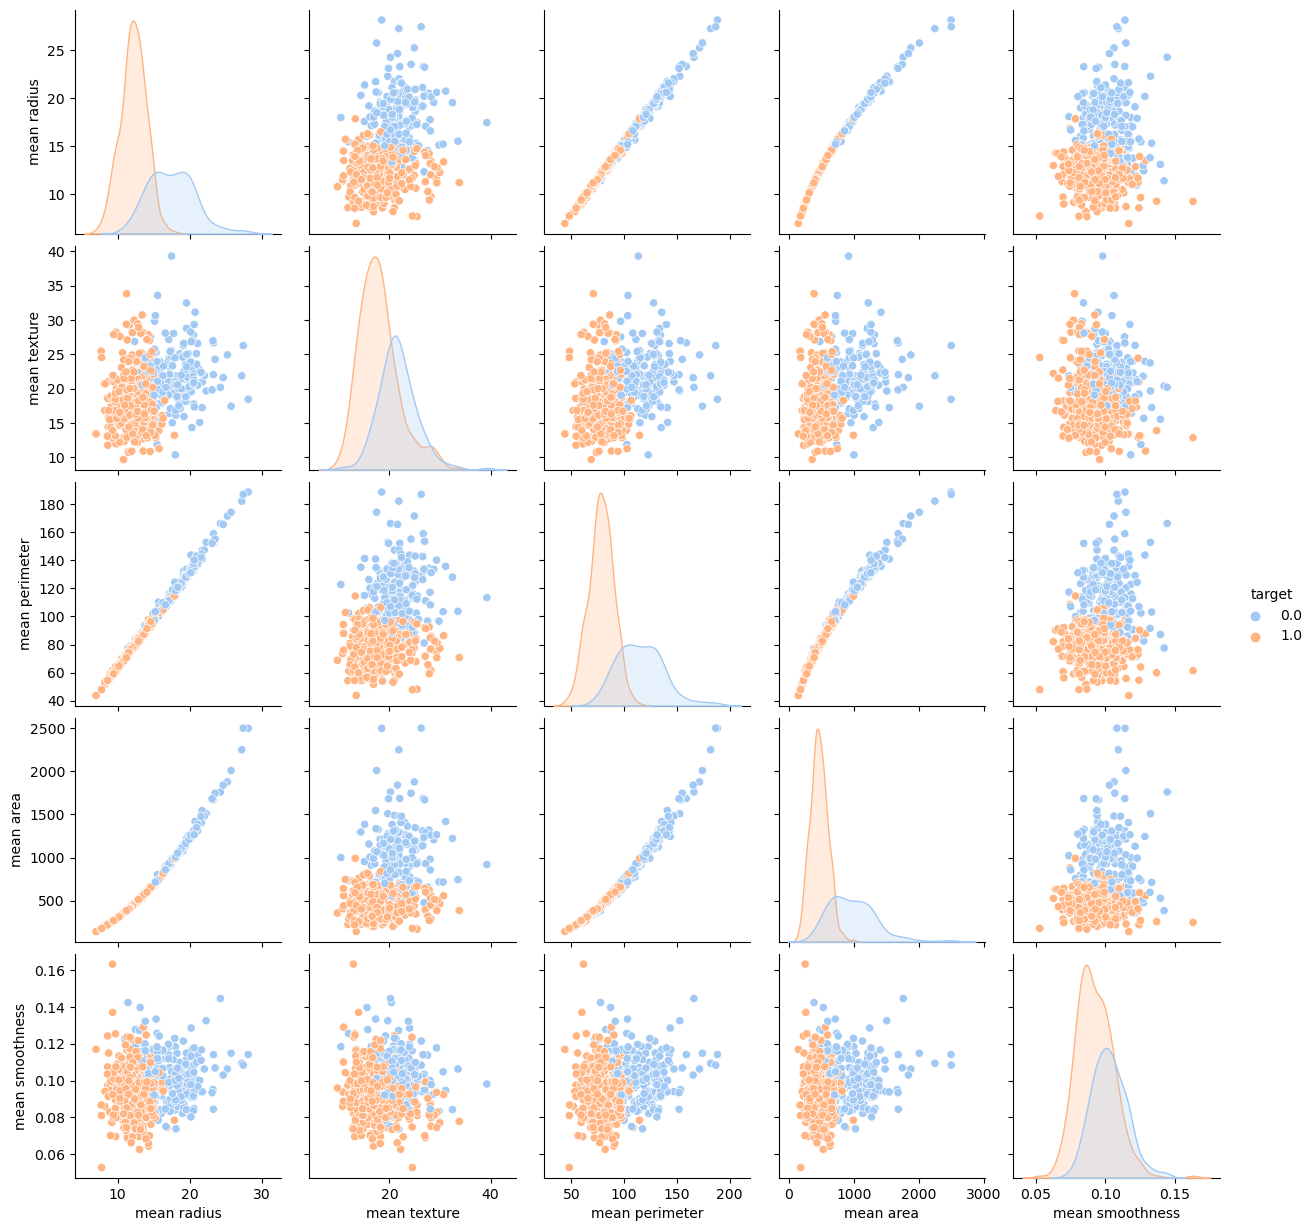

In [16]:
# pairplot with hue target
sns.pairplot(df_cancer, hue ='target',vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], palette='pastel')
# to show
plt.show()

<Axes: xlabel='mean area', ylabel='mean smoothness'>

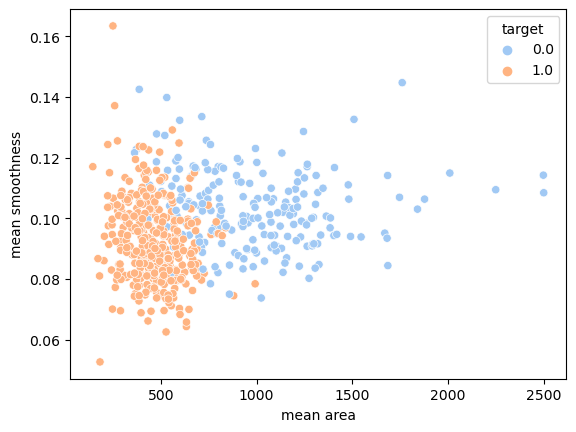

In [17]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue='target', data = df_cancer, palette="pastel")

## 3. Training and Evaluating the Model

In [18]:
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(f'The number of X_train: {X_train.shape[0]}')
print(f'The number of X_test: {X_test.shape[0]}')

model = SVC()
model.fit(X_train, y_train)

predictions_m1 = model.predict(X_test)

accuracy_m1 = accuracy_score(y_test, predictions_m1)
print(f'The accuracy score is {round(accuracy_m1*100,3)}')


The number of X_train: 398
The number of X_test: 171
The accuracy score is 93.567


<Axes: >

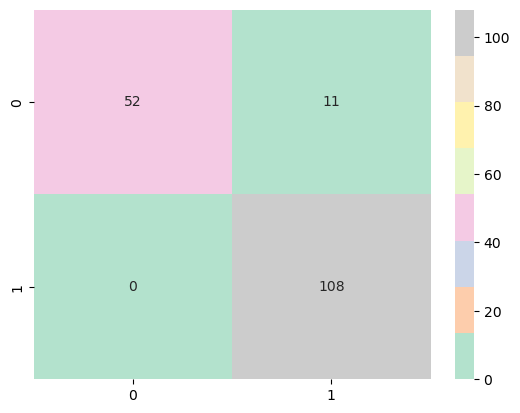

In [20]:
results_m1 = confusion_matrix(y_test, predictions_m1)
sns.heatmap(results_m1, annot = True, fmt='g',  cmap='Pastel2')


In [21]:
print(classification_report(y_test, predictions_m1))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.90        63
         1.0       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



## 4. Improving the Model

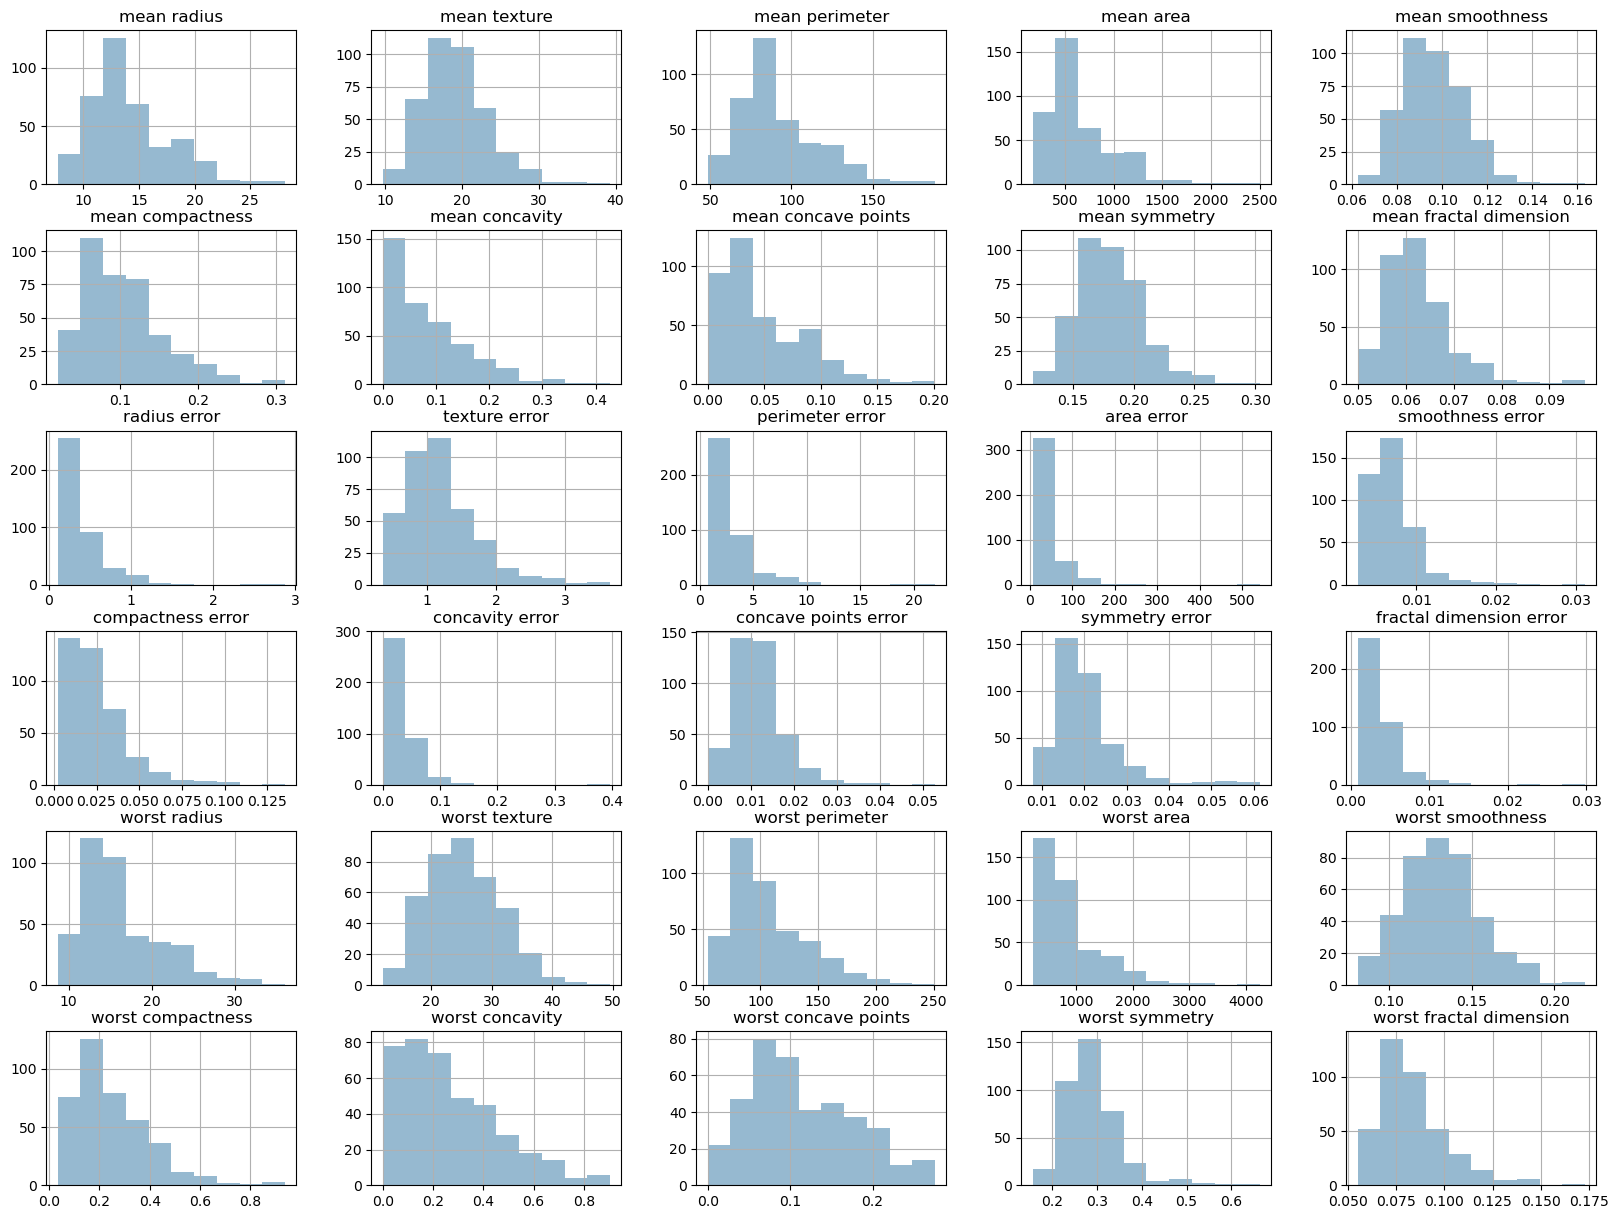

In [22]:
X_train.hist(figsize=(20,15), color='#96B9D0');
#features show non gausian distribution 

**when to normalize (min-max scale) and when to standardize data:**
>Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, standardization can be more practical for many machine learning algorithms. The reason is that many linear models, such as the logistic regression and SVM, [...] initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.partial_fit(X_train)

MinMaxScaler()

In [24]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = cancer['feature_names'])
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.296244,0.277308,0.283818,0.177894,0.167807,0.151976,0.067502,0.066054,0.163374,0.122999,...,0.243476,0.278252,0.217071,0.124628,0.115640,0.163881,0.173124,0.218396,0.154741,0.128009
1,0.278123,0.225905,0.269406,0.164378,0.085638,0.184474,0.189597,0.139165,0.136145,0.174179,...,0.204006,0.285981,0.190636,0.101355,0.154940,0.242126,0.366172,0.325762,0.095210,0.180061
2,0.342769,0.144403,0.355879,0.208401,0.402319,0.562359,0.339738,0.313121,0.490657,0.507582,...,0.284409,0.168443,0.303035,0.145296,0.364200,0.364306,0.356321,0.402032,0.248768,0.314005
3,0.255595,0.223876,0.243936,0.148460,0.167509,0.117389,0.090745,0.118141,0.353444,0.141323,...,0.190118,0.265991,0.184637,0.093539,0.207437,0.128688,0.195262,0.298803,0.287601,0.122499
4,0.290367,0.457220,0.277183,0.172831,0.296858,0.164681,0.069681,0.121421,0.265350,0.169545,...,0.243842,0.454957,0.219053,0.125595,0.294203,0.129905,0.116117,0.260305,0.212300,0.122838


In [25]:
scaler.partial_fit(X_test)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = cancer['feature_names'])
X_test_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,0.290017,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
1,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,0.097936,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
2,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,0.168492,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
3,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,0.443555,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
4,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,0.376158,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504


## 5. Training the model again with normalized data

In [26]:
model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)
results_scaled = confusion_matrix(y_test, y_pred_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'The accuracy score after normalizing data is {round(accuracy_scaled*100, 3)}')


The accuracy score after normalizing data is 98.83


<Axes: >

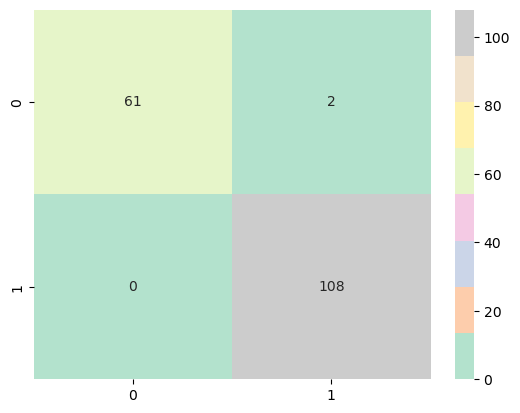

In [27]:
sns.heatmap(results_scaled, annot = True, fmt='g', cmap='Pastel2')

In [28]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



## Bonus tweaking for further model improvements

In [29]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

c_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 0.01, 0.001, 0.0001]
kernels = ['rbf']
param_grid = {'C': c_values, 'gamma': gamma_values, 'kernel': kernels}

In [30]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.911 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [31]:
grid.best_params_


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
grid_pred = grid.predict(X_test_scaled)
results_gridS = confusion_matrix(y_test, grid_pred)
accuracy_gridS = accuracy_score(y_test, grid_pred)
print(f'Accuracy Score after gridsearchCV is: {round(accuracy_gridS*100, 3)}')

Accuracy Score after gridsearchCV is: 98.83


<Axes: >

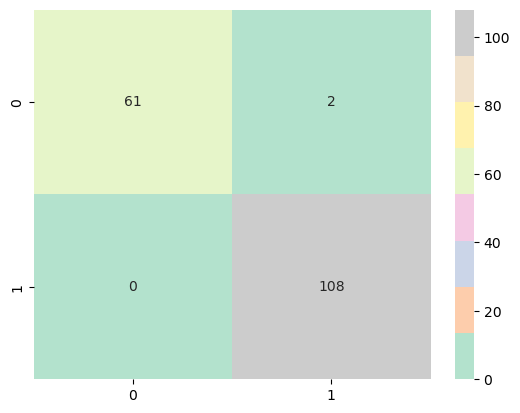

In [33]:
sns.heatmap(results_gridS, annot = True, fmt='g', cmap='Pastel2')

In [34]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



Looks like it can't get any better than 98% Accuracy Score. 

I will make another notebook that uses Binary Tree Model to see what is the difference :)